# Regression | Airbnb London | Project 2

### Introduction:

[Airbnb, Inc.](https://en.wikipedia.org/wiki/Airbnb) is an company that offers home rentals around the world. It primarily serves homestays for vacation purposes. In this project, we will look into Airbnb properties in London from the year 2014-2019.

The purpose of this project is to provide a prediction of expected rental price per night in London, conditional on the metrics of a property. This not only explains to us the important factors in determining the expected rental price (and hence value) of a property, but also allows us to evaluate if a listed property is underpriced or overpriced, such that tenants and owners can both exploit this to make better decisions.

Such prediction relies on regression modelling, where we consider metrics or factors such as an array of review scores, the number of reviews, the number of bedrooms and and even if the host is a superhost. 

In the initial parts of this project, we conduct data cleaning, train-test split and exploratory data analysis. Then, we use the gained knowledge in handling missing values and outliers, feature selection and accordingly using a suitable regression model for price prediction.

If you have spotted a mistake, or have any comments or enquiries regarding my projects, please don't hesitate to contact me at nghugoryan(at)gmail(dot)com.


### Conclusion:
- Model characteristics
    - Linear regression given by backward elimination algorithm and manual feature selection
    - Raw variables used in the model (ie these variables are significant):
        - Numerical: `accommodates`, `review_scores_location`
        - Categorical: `host_is_superhost`, `property_type`, `room_type`, `cancellation_policy`, 
   
   
- Assumptions used in our model
    - Technical assumptions of linear regression: linearity between X and y, independent errors, homoscedastic errors and normally distributed errors    
    - We are assuming observations with at least 10 reviews give us reliable enough information. On the other hand, observations with less than 10 reviews have been dropped, since we cannot be confident about their review scores. For example, properties with 0 reviews have all scores 0, which do not truly reflect the quality of the properties.
    - We don't have specific locations in the dataset, other than that all observations are inside London. Hence, we are homogenizing geographic locations within London. This is a bad assumption, but we have to made do.
    - We don't have specific date range other than 2015-2019. Similar to the above reasoning, we have to assume homogenization of time.
    

- Findings for tenants and owners
    - The model only has an R-squared of 0.64 on test set, so it provides some insight but is not definitive. Tenants or owners should use this model with caution.
    - Since price and ratings have low correlation, tenants should understand that higher price does not necessarily result in better return

### Licensing:
The Airbnb datasets used in this analysis are found at [Inside Airbnb](http://insideairbnb.com/get-the-data.html). It is work dedicated to the public domain under the [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/). 

## 1. Import libraries and load datasets
Since this project focuses on regression instead of exploratory data analysis (EDA), let's use an EDA tool called `pandas-profiling`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import profile_report

%matplotlib inline

# display all columns
pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv('airbnb_listings.csv')

## 2. Examine columns and conduct train-test split
Treatments or assumptions already done in the background:
- Observations with less than 10 reviews have been dropped, since we cannot be confident about their review scores. For example, properties with 0 reviews have all scores 0, which do not truly reflect the quality of the properties.
- We don't have specific locations in the dataset, other than that all observations are inside London. Hence, we are homogenizing geographic locations within London. This is a bad assumption, but we have to made do.
- We don't have specific date range other than 2015-2019. Similar to the above reasoning, we have to assume homogenization of time.

Let's look at the structure of the dataframe:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29394 entries, 0 to 29393
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            29394 non-null  int64  
 1   host_identity_verified       29394 non-null  int64  
 2   property_type                29394 non-null  object 
 3   room_type                    29394 non-null  object 
 4   accommodates                 29394 non-null  int64  
 5   bathrooms                    29394 non-null  float64
 6   bedrooms                     29377 non-null  float64
 7   beds                         29376 non-null  float64
 8   bed_type                     29394 non-null  object 
 9   number_of_reviews            29394 non-null  int64  
 10  review_scores_rating         29392 non-null  float64
 11  review_scores_cleanliness    29380 non-null  float64
 12  review_scores_checkin        29380 non-null  float64
 13  review_scores_co

Let's convert variables that should be categories to categorical datatype. The variables that need such conversion are `host_is_superhost`, `host_identity_verified` and all variables of object datatype.

In [4]:
col_list = ['host_is_superhost', 'host_identity_verified', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
for col in col_list:
    df[col] = df[col].astype("category")

Now we conduct train-test split on `df`.

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=0)

Since we have partitioned `df` into `train` and `test`, the latter two already contains all information in `df`. Further, since we will do EDA and modelling on `train`, we will not work with `df`. 

We now delete `df`.

In [6]:
del df

## 3. Exploratory data analysis
### `Pandas-profiling`
### Please see `train_profile_report.html` at [LINKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK]()
# LINK
# LINK
# LINK
The report is created with the following code:

In [7]:
report = train.profile_report(
    title="""Dataset 'train' Profiling Report""",
    correlations={
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False}
    },
    interactions=None
)

We can uncomment and run the cell below to save the report in HTML. Since I already have the report, I will comment it out.

In [8]:
# report.to_file("train_profile_report.html")

#### Please see the report `train_profile_report.html` at [LINKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK]()

### Further analysis on numerical variables (specifically outlier analysis)
Let's also make boxplots and pairplots (scatterplots) for numerical variables.

#### Boxplots
This is to analyze the distribution of each numerical variable. We first select all numerical columns. Then we create the plot

In [9]:
num_cols = train.iloc[:, (np.where((train.dtypes == np.int64) | (train.dtypes == np.float64)))[0]].columns.to_list()
print(num_cols)

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']


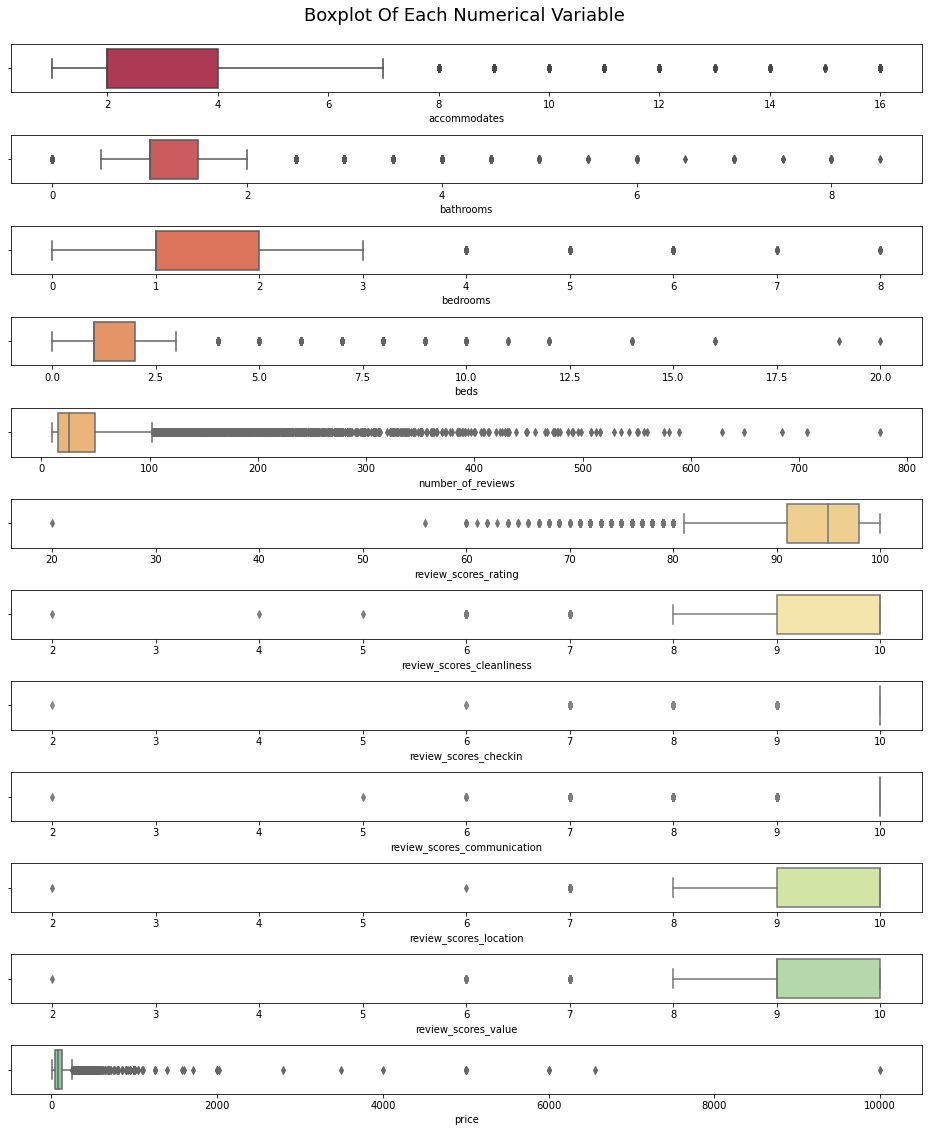

In [10]:
import itertools

# Change colors for each iteration
palette = itertools.cycle(sns.color_palette("Spectral", 15))

fig, ax = plt.subplots(len(num_cols), 1, figsize=(13, 16))
for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=train, color=next(palette), ax=ax[i])
    
fig.suptitle('Boxplot Of Each Numerical Variable\n', fontsize=18)

fig.tight_layout()

#### Pairplots
This is to analyze the relationship between pairs of numerical variables.

Text(0.5, 1.06, 'Scatterplot Between Numerical Variables\n(double click to enlarge/shrink)\n')

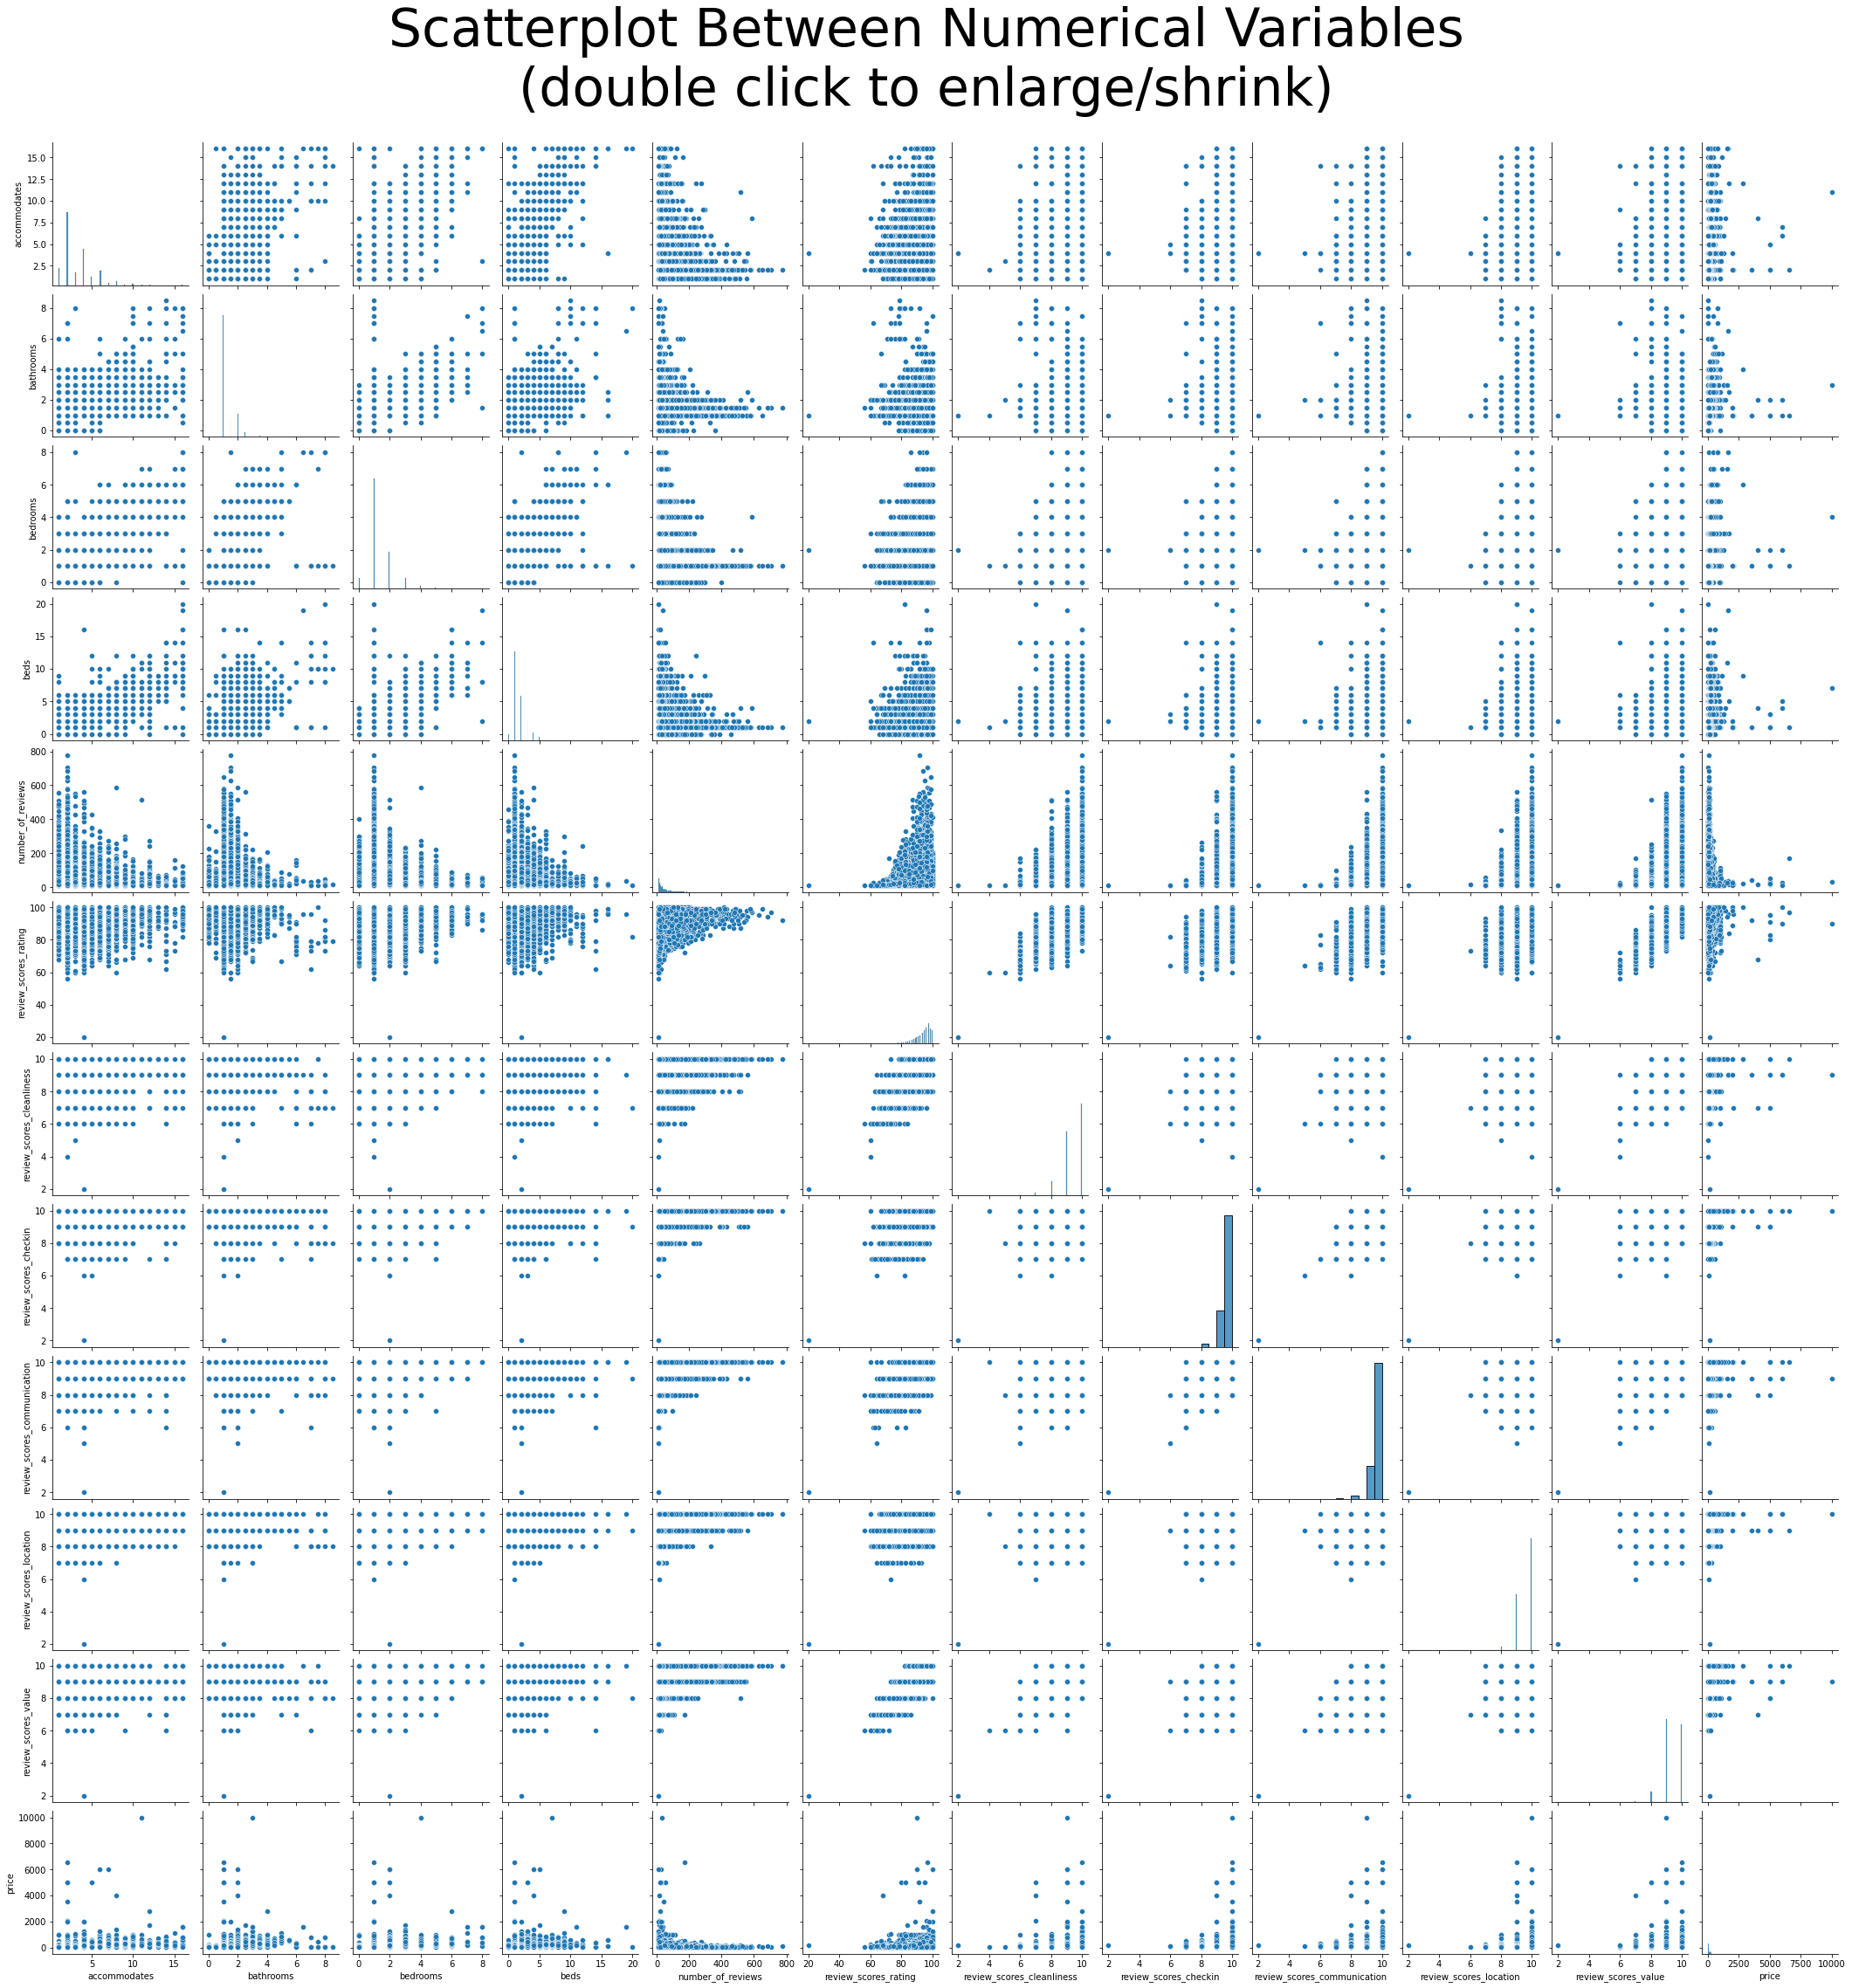

In [11]:
p = sns.pairplot(train[num_cols])
p.fig.suptitle('Scatterplot Between Numerical Variables\n(double click to enlarge/shrink)\n', fontsize=60, y=1.06)

#### Conclusion on exploratory data analysis
- High correlation, multicollinearity:
    - As we can see from `train_profile_report.html`, some features have high correlation with one another. To avoid multicollinearity, we might want to fit only one of them in our model. We can do so manually and/or using iterative feature selection, for example backward elimination.
        - Features with high correlation are, for example, those of `review_scores` or those pertaining to capacity like `accommodates` and `bedrooms`

- Outliers:
    - There are a number of univariate outliers (diamonds in boxplots) and bivariate outliers (in each scatterplot, points far away from the bulk of scatterplots)

- Missing values:
    - From the report `train_profile_report.html` at [LINKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK](), we see from the correlation matrix of variables (heatmap):
        - Very strong correlation (Pearson's or Spearman's rank) between all review scores except for `review_scores_location`. 
        - Very strong correlation (Pearson's or Spearman's rank) between `accommodates`, `bedrooms` and `beds`. 

## 4. Handle missing values
 - For reasons of multicollienarity and the fact that there are no missing values in `review_scores_rating`, delete all review score columns except `review_scores_location` and `review_scores_rating`.
 - For reasons of multicollienarity and the fact that there are no missing values in `accommodates`, delete the columns `bedrooms` and `beds`.

In [12]:
train = train.drop(['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                         'review_scores_value', 'bedrooms', 'beds'], axis=1)

Let's examine the rows that still have missing values. We put these rows into `null_data`, which shows that all remaining missing values are from `review_scores_rating`. 

In [13]:
null_data = train[train.isnull().any(axis=1)]
null_data

,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bathrooms,bed_type,number_of_reviews,review_scores_rating,review_scores_location,cancellation_policy,price
203,0,0,House,Private room,5,2.5,Real Bed,120,99.0,NaN,flexible,400
9881,1,1,Apartment,Entire home/apt,4,1.0,Real Bed,201,95.0,NaN,strict,150
167,0,1,Apartment,Private room,1,1.0,Pull-out Sofa,490,99.0,NaN,moderate,60
9879,1,1,Apartment,Entire home/apt,6,1.0,Real Bed,256,96.0,NaN,strict,180
9880,1,1,Apartment,Entire home/apt,6,1.0,Real Bed,232,95.0,NaN,strict,180
1038,1,1,Apartment,Entire home/apt,2,1.0,Real Bed,197,96.0,NaN,strict,125
22228,1,1,House,Private room,2,1.0,Real Bed,124,98.0,NaN,strict,68
1074,1,1,Apartment,Private room,2,1.0,Real Bed,575,99.0,NaN,moderate,52
9878,1,1,Apartment,Entire home/apt,6,1.0,Real Bed,234,95.0,NaN,strict,180
14306,1,0,Apartment,Entire home/apt,2,1.0,Real Bed,267,98.0,NaN,strict,195


Among the above rows, the values in other features are commonly found inside the histograms of variables in `train_profile_report.html` at [LINKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK](). Further, by visual comparison with the first and last rows in `train_profile_report.html` at [LINKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK](), we don't find anything that deviates from the rows with missing values in `review_scores_location`. Hence, we will just delete these missing rows.


XXXXXX
XXXXXXX

XXXXXX
XXXXXXX

XXXXXX
XXXXXXX
XXXXXX



XXXXXX
XXXXXXX

XXXXXX
XXXXXXX
XXXXXX
XXXXXXX

XXXXXX
XXXXXXX

In [14]:
train = train.dropna()
train = train.reset_index(drop=True)

We will now do the same treatments on the test set (without information leakage).

In [15]:
test = test.drop(['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                         'review_scores_value', 'bedrooms', 'beds'], axis=1)
test = test.dropna()
test = test.reset_index(drop=True)

## 5. Feature engineering, feature selection and target transformation

Feature engineering:
- Feature engineering allows for better utilization of data in model fitting. It gives us a better representation of information inside our data.
- From the correlation matrix of candidate numerical features below, we notice that the Spearman correlation between `accommodates` and `price` is much higher than that of Pearson correlation (0.7 vs 0.35). Hence, considering polynomial terms of `accommodates` might give us a better representation of price. Let's try polynomial terms up to the 4th order.
- Further, due to the construction of backward elimination in our upcoming stages of fitting the model, we need to explicitly specify the intercepts of the design matrix, and disable that inside `statsmodels.formula.api`.

Feature selection:
- Feature selection is needed to avoid overfitting and fitting an unnecessarily complex model.
1. We first print the correlation matrix of our variables, and see if there are any variables to drop right away.
2. Then, we will make use of backward elimination to further remove features. Note that this backward elimination algorithm needs to support both numerical variables and categorical variables. 

Target transformation:
- `price` is highly skewed to the right, as seen in the report [train_profile_report.html LINKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK](LINK). Hence, we will apply a log-transformation on it for compensation.

#### Correlation matrix of candidate numerical features

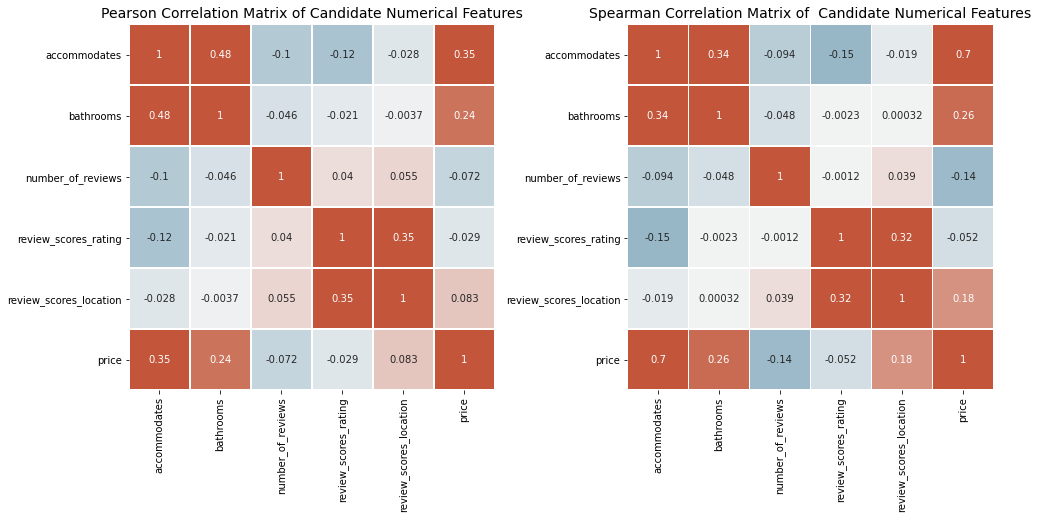

In [16]:
corr_p = train.corr(method='pearson')
corr_s = train.corr(method='spearman')

fig, ax = plt.subplots(1, 2, figsize=(14, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_p, cmap=cmap, vmax=.3, center=0, annot=True, cbar=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
sns.heatmap(corr_s, cmap=cmap, vmax=.3, center=0, annot=True, cbar=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])

ax[0].set_title('Pearson Correlation Matrix of Candidate Numerical Features', fontsize=14)
ax[1].set_title('Spearman Correlation Matrix of  Candidate Numerical Features', fontsize=14)

fig.tight_layout()

In [17]:
# We include all features in X_train, along with polynomial terms of 'accommodates' up to degree 4
X_train = pd.concat([train.iloc[:, :-1], 
           train['accommodates']**2, 
           train['accommodates']**3, 
           train['accommodates']**4], 
          axis=1)
X_train.columns = ([name for name in train.iloc[:, :-1].columns.values] + ['accommodatesP2', 'accommodatesP3', 'accommodatesP4'])

# In view of including 'accommodates', we remove 'bathrooms' to avoid multicollinearity, 
# This is because they share Pearson correlation of 0.48
X_train = X_train.drop(['bathrooms'], axis=1)

# log-transform price as stated
y_train = train.iloc[:, -1]
y_train = np.log(np.log(y_train))
y_train.name = 'log_price'

# The construction of our our backward selection algorithm, requires us to explictly specify the intercepts in the training set
intercept = pd.Series([1]*train.shape[0])
intercept.name = 'intercept'

# Modified train set
train_mod = pd.concat([intercept, X_train, y_train], axis=1)

Note that we have modified the train set `train` to `train_mod` above. To ensure we don't mistakenly use the original `train`, we delete it. Also, let's look at what `train_mod` looks like.

In [18]:
del train

In [19]:
train_mod

,intercept,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bed_type,number_of_reviews,review_scores_rating,review_scores_location,cancellation_policy,accommodatesP2,accommodatesP3,accommodatesP4,log_price
0,1,0,0,Apartment,Entire home/apt,6,Real Bed,107,85.0,9.0,strict,36,216,1296,1.623125
1,1,0,1,Apartment,Private room,1,Real Bed,50,97.0,10.0,strict,1,1,1,1.477511
2,1,0,0,Apartment,Private room,2,Real Bed,10,80.0,10.0,strict,4,8,16,1.224128
3,1,1,1,Apartment,Entire home/apt,6,Real Bed,12,88.0,10.0,strict,36,216,1296,1.596246
4,1,0,0,Apartment,Private room,2,Real Bed,17,91.0,9.0,moderate,4,8,16,1.409607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23499,1,1,1,House,Entire home/apt,7,Real Bed,13,92.0,10.0,flexible,49,343,2401,1.740544
23500,1,1,0,House,Private room,2,Real Bed,22,100.0,10.0,flexible,4,8,16,1.388126
23501,1,0,0,Apartment,Shared room,6,Real Bed,135,89.0,9.0,strict,36,216,1296,1.097189
23502,1,0,1,Apartment,Entire home/apt,4,Real Bed,46,88.0,10.0,moderate,16,64,256,1.610227


## 6. Model fitting

We explain our procedures with the following points:

Linear regression:
 - We want simple explanation of the model. Hence, we rely on linear regression, instead of other methods such as random forest regression, which can be black box models.
 
Outliers:
 - We did see some outliers in the boxplots and pairplots in our explanatory data analysis. We plan to first fit a linear regression, then look at diagnostic plots to understand the quality of fit.

No categorical variable encoding:
 - No need for categorical variable encoding, since `statsmodels.formula` already does that for us when we fit a linear regression model.

Feature select via backward elimination:
 - Recall there are many columns that do not correlate (Pearson or Spearman) with `price`. Hence, we want to feature select to avoid overfitting. 
 - We must design backward elimination in a way that supports categorical variables.

#### Fit the model with backward elimination

For our model fitting and diagnostic plots, we will need the following modules:

In [20]:
from matplotlib import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

We visualize how the backward elimination takes place. For each iteration, we will print the p-values, the variable to be eliminated and its p-value. At the end of the algorithm, we will print the variables remaining in the model.

In [21]:
# Variables for visualization purposes
i=0
BOLD = '\033[1m'  # to start bold formatting
END = '\033[0m'  # to end bold formatting

# Backward elimination variables
y_name = 'log_price'
significance_level = 0.0001  # We have chosen an extremely significant p-value. 

# Here starts the algorithm.

# Initially, 'remaining_features' contains all features (careful, 'log_price' isn't a feature)
remaining_features = train_mod.columns.tolist()
remaining_features.remove('log_price')

# Sidenote: We exit the loop in one of two reasons:
# 1. The while loop condition fails, ie all features are deemed insignificant and are eliminated from 'remaining_features'.
#    Note that this is an extreme case, where no feature at all from our dataset are significant!!!
# 2. We break out of the loop with a break statement (at the end of algo), ie all 'remaining features' are significant 
#    and are kept in the model. If there are any significant features in our dataset, this is how we will exit the loop.

while (remaining_features != []):
    pvals = pd.Series(index=remaining_features, dtype='float64') # Initially empty
        
    # Format a string to represent remaining_features. This is the format statsmodels.formula.api takes in
    remaining_features_string = "+".join(remaining_features)
    model = smf.ols(formula= y_name + ' ~ ' + remaining_features_string + '-1', data=train_mod)
    results = model.fit()

    # For categorical variables, if at least one encoded column has significant (small) p-value, keep the entire category
    pval_df = results.pvalues.reset_index()
    pval_df.columns = ['index', 'p_value']
    pval_df['variable'] = pval_df['index'].apply(lambda string: string.split('[')[0]) # Cat.vars. represent values in []
    grouped_pval = pval_df.groupby(['variable'])['p_value'].min()

    # Look at the most insignificant variable
    max_p_value = grouped_pval.max()
    
    # If the most insignificant variable is insignificant (large) enough, remove it. Otherwise, we keep all features.
    if(max_p_value>significance_level):
        remaining_features.remove(grouped_pval.idxmax())
    else:
        break
    
# Here ends the algorithm. What follows is just for visualization purposes.
    

    print(BOLD, f'Iteration {i+1} of backward elimination has the following p-values:', END)
    print(grouped_pval, '\n')
    print(BOLD, f'Among the above, \'{grouped_pval.idxmax()}\' has the most insignificant p-value of {max_p_value}. It is to be eliminated.')
    print('\n', '='*126, '\n')
    i +=1    
    
print(BOLD, 'Finally, the elimination ends. The variables remaining in the model are:', END)
print(remaining_features)

 Iteration 1 of backward elimination has the following p-values: 
variable
accommodates               2.449276e-67
accommodatesP2             1.137899e-15
accommodatesP3             2.549284e-09
accommodatesP4             1.873931e-07
bed_type                   1.100069e-01
cancellation_policy        2.702630e-11
host_identity_verified     3.763949e-02
host_is_superhost         1.248382e-106
intercept                 3.031622e-106
number_of_reviews          1.624746e-03
property_type              1.271757e-33
review_scores_location     0.000000e+00
review_scores_rating       1.830803e-01
room_type                  0.000000e+00
Name: p_value, dtype: float64 

 Among the above, 'review_scores_rating' has the most insignificant p-value of 0.18308031365733668. It is to be eliminated.


 Iteration 2 of backward elimination has the following p-values: 
variable
accommodates               3.234112e-67
accommodatesP2             1.153435e-15
accommodatesP3             2.488172e-09
accommodates

Formally, we backward eliminate by defining a function, then execute the function with relevant parameters.

In [22]:
def backward_selection(train, y_name, significance_level=0.05):
    """
    train: pandas dataframe, the entire train set including X and y
    y_name: string, the name of the target y
    significance_level: p-value thereshold to keep a feature (note we either delete or keep an entire categorical feature)
    """
    
    remaining_features = train.columns.tolist()
    remaining_features.remove('log_price')
    while (remaining_features != []):
        pvals = pd.Series(index=remaining_features, dtype='float64') # Initially empty
        remaining_features_string = " + ".join(remaining_features)
        model = smf.ols(formula= y_name + ' ~ ' + remaining_features_string + ' -1', data=train)
        results = model.fit()
        pval_df = results.pvalues.reset_index()
        pval_df.columns = ['index', 'p_value']
        pval_df['variable'] = pval_df['index'].apply(lambda string: string.split('[')[0]) # Cat.vars. represent values in []
        grouped_pval = pval_df.groupby(['variable'])['p_value'].min()
        max_p_value = grouped_pval.max()
        if(max_p_value>significance_level):
            remaining_features.remove(grouped_pval.idxmax())
        else:
            break
    return remaining_features, y_name + ' ~ ' + remaining_features_string + ' -1'

Below, we list the features (variables) to include in our model.
For our purposes, we will choose an extreme significance level of 0.0001. This eliminates more variables.

In [23]:
features_selected = backward_selection(train_mod, 'log_price', 0.0001)[0]
features_selected

['intercept',
 'host_is_superhost',
 'property_type',
 'room_type',
 'accommodates',
 'review_scores_location',
 'cancellation_policy',
 'accommodatesP2',
 'accommodatesP3',
 'accommodatesP4']

In [24]:
formula = backward_selection(train_mod, 'log_price', 0.0001)[1]
formula

'log_price ~ intercept + host_is_superhost + property_type + room_type + accommodates + review_scores_location + cancellation_policy + accommodatesP2 + accommodatesP3 + accommodatesP4 -1'

In [25]:
design_matrix = train_mod[features_selected]
design_matrix

,intercept,host_is_superhost,property_type,room_type,accommodates,review_scores_location,cancellation_policy,accommodatesP2,accommodatesP3,accommodatesP4
0,1,0,Apartment,Entire home/apt,6,9.0,strict,36,216,1296
1,1,0,Apartment,Private room,1,10.0,strict,1,1,1
2,1,0,Apartment,Private room,2,10.0,strict,4,8,16
3,1,1,Apartment,Entire home/apt,6,10.0,strict,36,216,1296
4,1,0,Apartment,Private room,2,9.0,moderate,4,8,16
...,...,...,...,...,...,...,...,...,...,...
23499,1,1,House,Entire home/apt,7,10.0,flexible,49,343,2401
23500,1,1,House,Private room,2,10.0,flexible,4,8,16
23501,1,0,Apartment,Shared room,6,9.0,strict,36,216,1296
23502,1,0,Apartment,Entire home/apt,4,10.0,moderate,16,64,256


In [26]:
model = smf.ols(formula=formula, data = train_mod)  # We are using the variables in the design matrix, see variable 'formula'
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2183.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:23:20   Log-Likelihood:                 21409.
No. Observations:               23504   AIC:                        -4.278e+04
Df Residuals:                   23483   BIC:                        -4.261e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

We have a warning on multicollinearity. Let's investigate the correlation of the selected numerical variables.

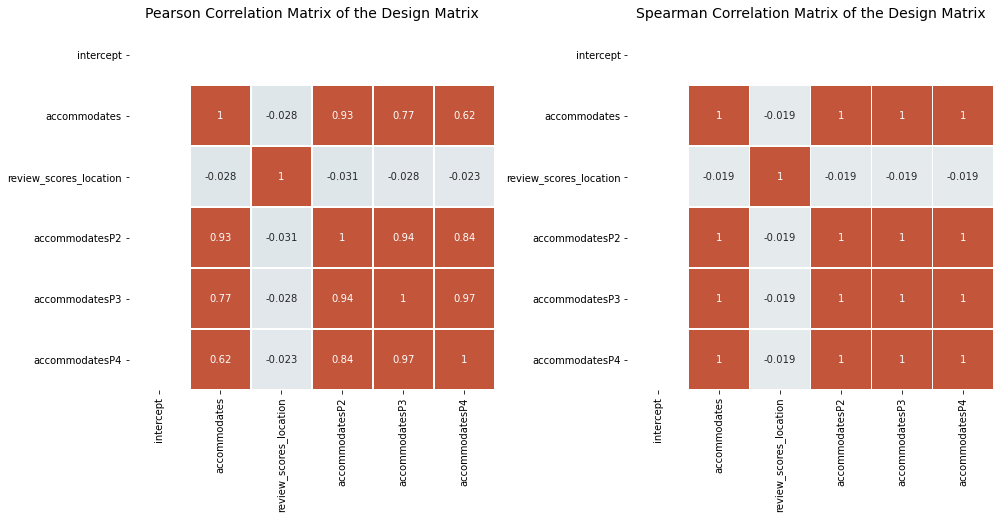

In [27]:
corr_p = design_matrix.corr(method='pearson')
corr_s = design_matrix.corr(method='spearman')

fig, ax = plt.subplots(1, 2, figsize=(14, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_p, cmap=cmap, vmax=.3, center=0, annot=True, cbar=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
sns.heatmap(corr_s, cmap=cmap, vmax=.3, center=0, annot=True, cbar=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])

ax[0].set_title('Pearson Correlation Matrix of the Design Matrix', fontsize=14)
ax[1].set_title('Spearman Correlation Matrix of the Design Matrix', fontsize=14)

fig.tight_layout()

We find that the strong correlations come from that between `accommodates` and its polynomials.

Note that we are using raw polynomials, rather than orthogonal polynomials. We do not use orthogonal polynomials as using it means we lose some interpretability. Since there are no other issues of multicollinearity, we keep these features as is.

## 7. Model assessment

After fitting the model, we will see if the model's assumptions have been achieved and test the model's explanatory power. 
 - Technical assumptions: assess so by looking at diagnostic plots
 - Explanatory power: look at the statistical output of our model, and also the R-squared of our model on the test set

### 7i. Evaluation of model using diagnostic plots (technical assumptions)
Recall the four assumptions of linear regression:
 - linearity between X and y
 - independent errors
 - homoscedastic errors
 - normally distributed errors
 
We now analyze the model with some diagnostic plots:

#### Residuals vs fitted values plot

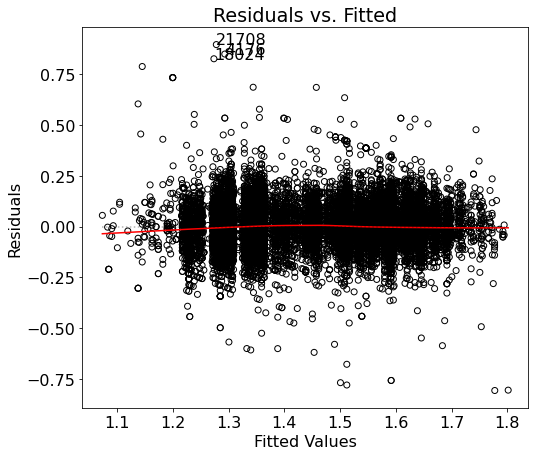

In [28]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

##### Interpretation of the residuals vs fitted values plot:

The local regression line (red line) is quite close to 0 throughout fitted values, meaning that the mean residual is close to 0 throughout. This signals linearity and independence of errors (no autocorrelation).

From the distribution of the scatterplot, we see somewhat of a vertically even distribution. However, the variance is not perfectly constant throughout fitted values. This may be a slight violation of homoskedasticity.

#### Normal Q-Q plot

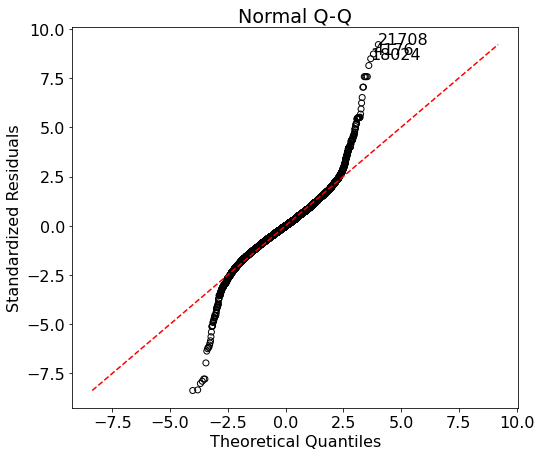

In [29]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

##### Interpretation of the QQ plot:
The actual standardized distribution is more heavy tailed than the standard normal distribution. This is what we can see from the deviations of the two black ends from the red dotted line, where both ends lean towards vertical. This may be a violation of the assumption of normal distribution of errors.

Hence the model's fit to the data is not perfect. The model is not able to explain some large deviations from the predicted values. However, since there were a lot of outliers in our exploratory data analysis, a better model may be hard to find.

#### Residuals vs leverage plot

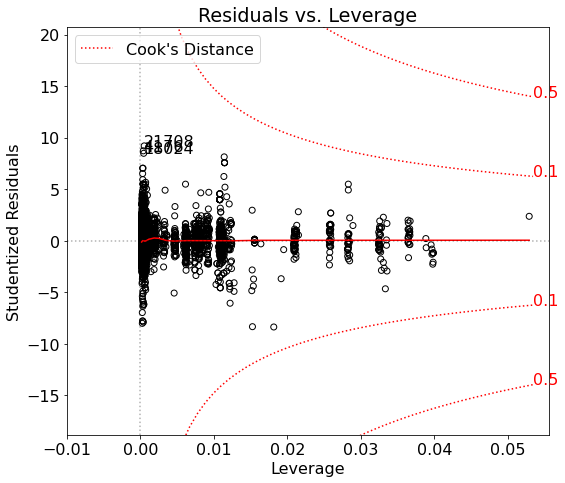

In [30]:
student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
student_residuals.index = results.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = results.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-abs(min(y))*1.25,max(y)+abs(max(y))*1.25)
ax.set_xlim(-0.01,max(x)+abs(max(x))*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(results.params)
poscooks01y = np.sqrt(0.1*(p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks01y = -np.sqrt(0.1*(p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks01y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks01y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('0.1', xy = (xpos, poscooks01y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('0.1', xy = (xpos, negcooks01y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

##### Interpretation of the residuals vs leverage plot:

All points are within 0.1 Cook's distance, meaning the influence of each observation on the fitted response values is limited.
- There are a number of points with high residual but low leverage. Hence, each point's influence is low.
- Most points have low leverage. the highest leverage of a point is a bit over 0.05. Points with high leverage in our dataset tend not to have high residual. Hence, each point's influence is also low.

This means that our model is not too susceptible to outliers.

#### Quick summary from diagnostic plots (assess technical assumptions of linear regression)
Achieved: linearity between X and y, independent errors

Somewhat achieved: homoscedastic errors, normally distributed errors


### 7ii. Assess the model with test set

In [31]:
# Do the same treatment from the training set on the test set (this has no information leakage)

X_test = pd.concat([test.iloc[:, :-1], 
           test['accommodates']**2, 
           test['accommodates']**3, 
           test['accommodates']**4], 
          axis=1)
X_test.columns = ([name for name in test.iloc[:, :-1].columns.values] + ['accommodatesP2', 'accommodatesP3', 'accommodatesP4'])
X_test = X_test.drop(['bathrooms'], axis=1)

# log-transform price as stated
y_test = test.iloc[:, -1]
y_test = np.log(np.log(y_test))
y_test.name = 'log_price'

# The construction of our our backward selection algorithm, requires us to explictly specify the intercepts in the test set
intercept = pd.Series([1]*test.shape[0])
intercept.name = 'intercept'

In [32]:
test_matrix = pd.concat([intercept, X_test], axis=1)
test_matrix

,intercept,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bed_type,number_of_reviews,review_scores_rating,review_scores_location,cancellation_policy,accommodatesP2,accommodatesP3,accommodatesP4
0,1,0,0,Apartment,Private room,2,Real Bed,157,92.0,9.0,strict,4,8,16
1,1,0,0,Apartment,Private room,2,Real Bed,30,97.0,9.0,moderate,4,8,16
2,1,0,1,Apartment,Entire home/apt,6,Real Bed,10,94.0,9.0,strict,36,216,1296
3,1,0,1,Apartment,Entire home/apt,6,Real Bed,11,96.0,10.0,strict,36,216,1296
4,1,0,1,Apartment,Private room,1,Real Bed,17,100.0,10.0,moderate,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,1,1,1,Apartment,Private room,3,Real Bed,27,97.0,10.0,moderate,9,27,81
5872,1,1,0,Apartment,Entire home/apt,6,Real Bed,13,95.0,10.0,moderate,36,216,1296
5873,1,1,1,House,Private room,2,Real Bed,31,99.0,9.0,strict,4,8,16
5874,1,0,1,Apartment,Entire home/apt,3,Real Bed,22,86.0,9.0,strict,9,27,81


In [33]:
log_price_pred = results.predict(test_matrix)
price_pred = np.exp(log_price_pred)
price_pred.name = 'price_pred'

price_test = np.exp(y_test)
price_test.name = 'price_test'

In [34]:
# Calculate R squared for test set
1 - np.sum((price_pred - price_test)**2) / np.sum((price_test - np.mean(price_test))**2)

0.6428049052929133

We have achieved an R square of 0.64 on the test set, which is a fair amount of explained variation in price, especially on a somewhat human behavior of price setting.

## 8. Final Conclusion
- Model characteristics
    - Linear regression given by backward elimination algorithm and manual feature selection
    - Raw variables used in the model (ie these variables are significant):
        - Numerical: `accommodates`, `review_scores_location`
        - Categorical: `host_is_superhost`, `property_type`, `room_type`, `cancellation_policy`   
   
- Assumptions used in our model
    - Technical assumptions of linear regression: linearity between X and y, independent errors, homoscedastic errors and normally distributed errors    
    - We are assuming observations with at least 10 reviews give us reliable enough information. On the other hand, observations with less than 10 reviews have been dropped, since we cannot be confident about their review scores. For example, properties with 0 reviews have all scores 0, which do not truly reflect the quality of the properties.
    - We don't have specific locations in the dataset, other than that all observations are inside London. Hence, we are homogenizing geographic locations within London. This is a bad assumption, but we have to made do.
    - We don't have specific date range other than 2015-2019. Similar to the above reasoning, we have to assume homogenization of time.
    

- Findings for tenants and owners
    - The model only has an R-squared of 0.64 on test set, so it provides some insight but is not definitive. Tenants or owners should use this model with caution.
    - Since price and ratings have low correlation, tenants should understand that higher price does not necessarily result in better return